In [84]:
from tensorflow.keras.datasets import mnist
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
from torch import optim

(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = nn.functional.one_hot(torch.from_numpy(y_train).long(),num_classes=10).float()
y_test = nn.functional.one_hot(torch.from_numpy(y_test).long(),num_classes=10).float()
X_train = torch.from_numpy(X_train.reshape((len(X_train),784))).float()
X_test = torch.from_numpy(X_test.reshape((len(X_test),784))).float()

# Constructing More Complex Models
Today's exercise will focus on iterating on the models we've constructed in the past. In this case we will be making a simple feed forward network. Please work with a partner to modify the code below to consider more hidden layers. Do you think this will improve the results and by how much, what other kinds of models may be more capable of representing this data?

In [96]:
class MultiClassModel(nn.Module):
    def __init__(self, num_features, num_categories, learning_rate = .003):
        super().__init__()
        self.Linear = nn.Linear(num_features, num_categories)
        self.Loss = torch.nn.CrossEntropyLoss()
        self.LR = learning_rate

    def forward(self, x):
        return torch.softmax(self.Linear(x),dim=1)
    
    def train(self, x, y, num_epochs = 10):
        optimizer = optim.SGD(self.parameters(), lr = self.LR)
        self.ReportedLoss = {}
        for epoch in range(num_epochs):
            y_pred = self.forward(x)
            loss = self.Loss(y_pred, y)
            
            optimizer.zero_grad()
            loss.backward()            
            optimizer.step()
            
            self.ReportedLoss[epoch] = loss.item()
    
    def PlotLoss(self):
        x = [i[0] for i in self.ReportedLoss.items()]
        y = [i[1] for i in self.ReportedLoss.items()]
        plt.plot(x,y)
        plt.show()

In [97]:
model = MultiClassModel(X_train.shape[1],y_train.shape[1])
model.train(X_train,y_train,500)

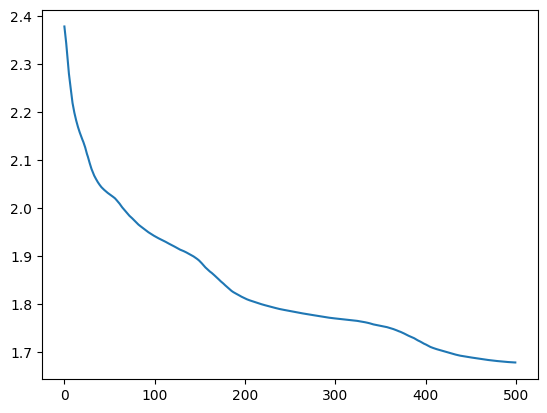

In [98]:
model.PlotLoss()